In [ ]:
!pip install tweepy
!pip install textblob
!pip install wordcloud
!pip install pandas
!pip install numpy
!pip install re
!pip install matplotlib.pyplot

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("luwu.csv")

In [3]:
df.head()

,created_at,text,tweet_en
0,Mon Aug 03 01:52:31 +0000 2020,Salam sehat #sobatkriskres berikut adalah upda...,"Healthy greetings #sobatkriskres, the followin..."
1,Sun Mar 25 14:25:02 +0000 2018,"Baramang, petani kakao dari Desa Saluparemang ...","Baramang, cocoa farmer from South Saluparemang..."
2,Fri Jul 03 14:11:23 +0000 2015,Tim Terpadu Di Lutra Temukan Bumbu Kue Kadalua...,The Integrated Team in Lutra Find Expired Cake...
3,Wed Feb 08 18:24:59 +0000 2017,Daftar Puskesmas di Kabupaten Luwu Provinsi Su...,"List of Puskesmas in Luwu Regency, South Sulaw..."
4,Mon Sep 24 04:00:54 +0000 2018,Sembilan PPL dan 76 Bidan di Luwu Utara Terima...,Nine PPLs and 76 Midwives in North Luwu Receiv...


In [4]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

df['tweet_en'] = df['tweet_en'].apply(cleanTxt)
df['text'] = df['text'].apply(cleanTxt)
df

,created_at,text,tweet_en
0,Mon Aug 03 01:52:31 +0000 2020,Salam sehat sobatkriskres berikut adalah updat...,"Healthy greetings sobatkriskres, the following..."
1,Sun Mar 25 14:25:02 +0000 2018,"Baramang, petani kakao dari Desa Saluparemang ...","Baramang, cocoa farmer from South Saluparemang..."
2,Fri Jul 03 14:11:23 +0000 2015,Tim Terpadu Di Lutra Temukan Bumbu Kue Kadalua...,The Integrated Team in Lutra Find Expired Cake...
3,Wed Feb 08 18:24:59 +0000 2017,Daftar Puskesmas di Kabupaten Luwu Provinsi Su...,"List of Puskesmas in Luwu Regency, South Sulaw..."
4,Mon Sep 24 04:00:54 +0000 2018,Sembilan PPL dan 76 Bidan di Luwu Utara Terima...,Nine PPLs and 76 Midwives in North Luwu Receiv...
5,Fri Oct 11 10:56:56 +0000 2019,Anak umur tiga tahun dari Kabupaten Luwu Utara...,A three year old child from North Luwu Regency...
6,Sun Feb 05 21:16:50 +0000 2017,Info Lengkap Apotek di Kabupaten Luwu Utara Pr...,Complete Info on Pharmacies in North Luwu Rege...
7,Sat Sep 17 04:50:52 +0000 2016,Puskesmas Wasuponda Kabupaten Luwu Timur adaka...,Puskesmas Wasuponda East Luwu Regency holds a ...
8,Sun May 10 09:28:29 +0000 2020,"Peduli Tenaga Medis, IDI Bagi APD ke Rumah Sak...","Care for Medical Personnel, IDI For PPE to Hos..."
9,Tue Apr 28 21:23:37 +0000 2020,"Seorang perawat di Kabupaten Luwu Timur, dinya...","A nurse in East Luwu Regency, tested positive ..."


In [5]:
#mendapatkan subjectivity dan polarity
def getSubjectivity(text):
    c = str(text)
    return TextBlob(c).sentiment.subjectivity

def getPolarity(text):
    c = str(text)
    return TextBlob(c).sentiment.polarity

df['Subjectivity'] = df['tweet_en'].apply(getSubjectivity)
df['Polarity'] = df['tweet_en'].apply(getPolarity)

In [6]:
df

,created_at,text,tweet_en,Subjectivity,Polarity
0,Mon Aug 03 01:52:31 +0000 2020,Salam sehat sobatkriskres berikut adalah updat...,"Healthy greetings sobatkriskres, the following...",0.300000,0.250000
1,Sun Mar 25 14:25:02 +0000 2018,"Baramang, petani kakao dari Desa Saluparemang ...","Baramang, cocoa farmer from South Saluparemang...",0.412500,0.350000
2,Fri Jul 03 14:11:23 +0000 2015,Tim Terpadu Di Lutra Temukan Bumbu Kue Kadalua...,The Integrated Team in Lutra Find Expired Cake...,0.000000,0.000000
3,Wed Feb 08 18:24:59 +0000 2017,Daftar Puskesmas di Kabupaten Luwu Provinsi Su...,"List of Puskesmas in Luwu Regency, South Sulaw...",0.000000,0.000000
4,Mon Sep 24 04:00:54 +0000 2018,Sembilan PPL dan 76 Bidan di Luwu Utara Terima...,Nine PPLs and 76 Midwives in North Luwu Receiv...,0.000000,0.000000
5,Fri Oct 11 10:56:56 +0000 2019,Anak umur tiga tahun dari Kabupaten Luwu Utara...,A three year old child from North Luwu Regency...,0.200000,0.100000
6,Sun Feb 05 21:16:50 +0000 2017,Info Lengkap Apotek di Kabupaten Luwu Utara Pr...,Complete Info on Pharmacies in North Luwu Rege...,0.400000,0.100000
7,Sat Sep 17 04:50:52 +0000 2016,Puskesmas Wasuponda Kabupaten Luwu Timur adaka...,Puskesmas Wasuponda East Luwu Regency holds a ...,0.000000,0.000000
8,Sun May 10 09:28:29 +0000 2020,"Peduli Tenaga Medis, IDI Bagi APD ke Rumah Sak...","Care for Medical Personnel, IDI For PPE to Hos...",0.000000,0.000000
9,Tue Apr 28 21:23:37 +0000 2020,"Seorang perawat di Kabupaten Luwu Timur, dinya...","A nurse in East Luwu Regency, tested positive ...",0.545455,0.227273


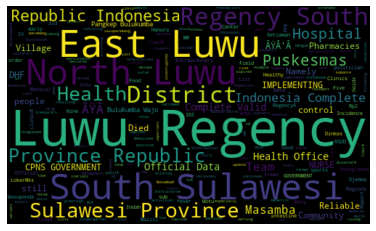

In [7]:
#wordcloud
allwords = ' '.join([twts for twts in df['tweet_en']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [8]:
#mendapatkan nilai sentimen
def getAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Neutral'
    else :
        return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getAnalysis)

df

,created_at,text,tweet_en,Subjectivity,Polarity,Sentiment
0,Mon Aug 03 01:52:31 +0000 2020,Salam sehat sobatkriskres berikut adalah updat...,"Healthy greetings sobatkriskres, the following...",0.300000,0.250000,Positive
1,Sun Mar 25 14:25:02 +0000 2018,"Baramang, petani kakao dari Desa Saluparemang ...","Baramang, cocoa farmer from South Saluparemang...",0.412500,0.350000,Positive
2,Fri Jul 03 14:11:23 +0000 2015,Tim Terpadu Di Lutra Temukan Bumbu Kue Kadalua...,The Integrated Team in Lutra Find Expired Cake...,0.000000,0.000000,Neutral
3,Wed Feb 08 18:24:59 +0000 2017,Daftar Puskesmas di Kabupaten Luwu Provinsi Su...,"List of Puskesmas in Luwu Regency, South Sulaw...",0.000000,0.000000,Neutral
4,Mon Sep 24 04:00:54 +0000 2018,Sembilan PPL dan 76 Bidan di Luwu Utara Terima...,Nine PPLs and 76 Midwives in North Luwu Receiv...,0.000000,0.000000,Neutral
5,Fri Oct 11 10:56:56 +0000 2019,Anak umur tiga tahun dari Kabupaten Luwu Utara...,A three year old child from North Luwu Regency...,0.200000,0.100000,Positive
6,Sun Feb 05 21:16:50 +0000 2017,Info Lengkap Apotek di Kabupaten Luwu Utara Pr...,Complete Info on Pharmacies in North Luwu Rege...,0.400000,0.100000,Positive
7,Sat Sep 17 04:50:52 +0000 2016,Puskesmas Wasuponda Kabupaten Luwu Timur adaka...,Puskesmas Wasuponda East Luwu Regency holds a ...,0.000000,0.000000,Neutral
8,Sun May 10 09:28:29 +0000 2020,"Peduli Tenaga Medis, IDI Bagi APD ke Rumah Sak...","Care for Medical Personnel, IDI For PPE to Hos...",0.000000,0.000000,Neutral
9,Tue Apr 28 21:23:37 +0000 2020,"Seorang perawat di Kabupaten Luwu Timur, dinya...","A nurse in East Luwu Regency, tested positive ...",0.545455,0.227273,Positive


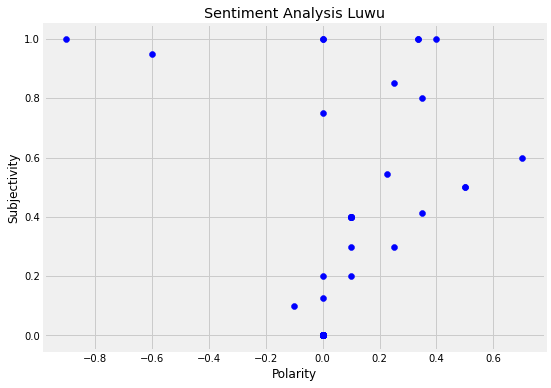

In [9]:
#plot the polarity and subjectivity
plt.figure(figsize =(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title("Sentiment Analysis Luwu")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

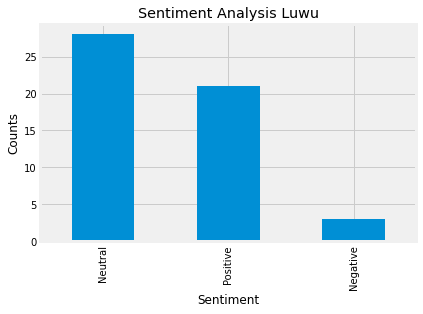

In [10]:
#Plot the sentiment
df['Sentiment'].value_counts()

plt.title("Sentiment Analysis Luwu")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Sentiment'].value_counts().plot(kind = "bar")
plt.show()

In [11]:
df_final = df[['created_at', 'text', 'Subjectivity', 'Polarity', 'Sentiment']]
df_final

,created_at,text,Subjectivity,Polarity,Sentiment
0,Mon Aug 03 01:52:31 +0000 2020,Salam sehat sobatkriskres berikut adalah updat...,0.300000,0.250000,Positive
1,Sun Mar 25 14:25:02 +0000 2018,"Baramang, petani kakao dari Desa Saluparemang ...",0.412500,0.350000,Positive
2,Fri Jul 03 14:11:23 +0000 2015,Tim Terpadu Di Lutra Temukan Bumbu Kue Kadalua...,0.000000,0.000000,Neutral
3,Wed Feb 08 18:24:59 +0000 2017,Daftar Puskesmas di Kabupaten Luwu Provinsi Su...,0.000000,0.000000,Neutral
4,Mon Sep 24 04:00:54 +0000 2018,Sembilan PPL dan 76 Bidan di Luwu Utara Terima...,0.000000,0.000000,Neutral
5,Fri Oct 11 10:56:56 +0000 2019,Anak umur tiga tahun dari Kabupaten Luwu Utara...,0.200000,0.100000,Positive
6,Sun Feb 05 21:16:50 +0000 2017,Info Lengkap Apotek di Kabupaten Luwu Utara Pr...,0.400000,0.100000,Positive
7,Sat Sep 17 04:50:52 +0000 2016,Puskesmas Wasuponda Kabupaten Luwu Timur adaka...,0.000000,0.000000,Neutral
8,Sun May 10 09:28:29 +0000 2020,"Peduli Tenaga Medis, IDI Bagi APD ke Rumah Sak...",0.000000,0.000000,Neutral
9,Tue Apr 28 21:23:37 +0000 2020,"Seorang perawat di Kabupaten Luwu Timur, dinya...",0.545455,0.227273,Positive


In [12]:
df_final.to_csv("sentiment_luwu.csv")